# Data Understanding

## Import Dataset

In [ ]:
# Default
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

# Mengunggah file
df = files.upload()

Saving Transaksi Pupuk Pengecer Dwi Putri - 1.csv to Transaksi Pupuk Pengecer Dwi Putri - 1 (1).csv


In [ ]:
df = pd.read_csv('Transaksi Pupuk Pengecer Dwi Putri - 1.csv')
df.head()

,Nama,Tanggal,Luas Lahan,UREA,NPK,ZA
0,KARYO SEMITO,1/1/2022,0.51,25,12,50
1,KASDI,4/1/2022,0.51,25,12,50
2,KEMAN KARTONO,5/1/2022,0.72,35,18,50
3,KEMIN,6/1/2022,1.05,51,26,50
4,KLIWADI,7/1/2022,1.05,51,26,50


## Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nama        1606 non-null   object
 1   Tanggal     1606 non-null   object
 2   Luas Lahan  1606 non-null   object
 3   UREA        1606 non-null   int64 
 4   NPK         1606 non-null   int64 
 5   ZA          1606 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 75.4+ KB


### Checking Missing Value

#### Checking Null Value

In [ ]:
# Percentage rows containing missing values
df_nan = df[df.isna().any(axis = 1)]
print(f'Persentase null value pada dataset : {round(len(df_nan)/len(df) * 100, 2)} %')

Persentase null value pada dataset : 0.0 %


## Exploratory Data Analysis

### Statistical Descriptive

#### Data Split

In [ ]:
df_eda = df.copy()
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nama        1606 non-null   object
 1   Tanggal     1606 non-null   object
 2   Luas Lahan  1606 non-null   object
 3   UREA        1606 non-null   int64 
 4   NPK         1606 non-null   int64 
 5   ZA          1606 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 75.4+ KB


In [ ]:
# numerical feature
num = df_eda.loc[:, (df_eda.dtypes == 'int64') | (df_eda.dtypes == 'float64')].columns.tolist()
print(num)
print(len(num))

['UREA', 'NPK', 'ZA']
3


In [ ]:
# categorical fearure
cat = df_eda.loc[:, (df_eda.dtypes == 'object')].columns.tolist()
print(cat)

['Nama', 'Tanggal', 'Luas Lahan']


#### Statistical Summary

In [ ]:
# Statistic Numerical Data
n_feats = ['ZA', 'NPK', 'UREA']
df_eda[n_feats].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ZA,1606.0,82.78,49.65,0.0,50.0,50.0,100.0,500.0
NPK,1606.0,55.17,39.61,5.0,26.0,42.0,82.0,332.0
UREA,1606.0,70.49,44.79,10.0,44.0,65.0,91.0,444.0


#### Categorical Features

In [ ]:
# Statistic Categorical Data
df_eda[cat].describe().T

,count,unique,top,freq
Nama,1606,753,SUWARNO,12
Tanggal,1606,410,15/04/2023,15
Luas Lahan,1606,100,"0,99",489


# Data Preparation

## Feature Selection

In [ ]:
df_selected = df_eda.copy()
df_selected = df_selected.drop(columns=['Nama', 'Luas Lahan', 'UREA', 'NPK'])
df_selected.head()

,Tanggal,ZA
0,1/1/2022,50
1,4/1/2022,50
2,5/1/2022,50
3,6/1/2022,50
4,7/1/2022,50


## Data Cleansing

In [ ]:
df_clean = df_selected.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tanggal  1606 non-null   object
 1   ZA       1606 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.2+ KB


In [ ]:
for i in df_clean:
    print('Tanggal')
    print(df_clean['Tanggal'].unique(), '\n')

Tanggal
['1/1/2022' '4/1/2022' '5/1/2022' '6/1/2022' '7/1/2022' '10/1/2022'
 '14/01/2022' '13/01/2022' '2/1/2022' '9/1/2022' '15/01/2022' '8/1/2022'
 '16/01/2022' '17/01/2022' '18/01/2022' '19/01/2022' '9/3/2022'
 '13/03/2022' '14/03/2022' '16/03/2022' '17/03/2022' '20/03/2022'
 '21/03/2022' '22/03/2022' '23/03/2022' '24/03/2022' '25/03/2022'
 '26/03/2022' '27/03/2022' '28/03/2022' '30/03/2022' '31/03/2022'
 '12/3/2022' '19/03/2022' '10/3/2022' '11/3/2022' '15/03/2022'
 '18/03/2022' '1/4/2022' '2/4/2022' '3/4/2022' '4/4/2022' '5/4/2022'
 '6/4/2022' '7/4/2022' '8/4/2022' '9/4/2022' '10/4/2022' '11/4/2022'
 '12/4/2022' '13/04/2022' '14/04/2022' '15/04/2022' '16/04/2022'
 '17/04/2022' '18/04/2022' '19/04/2022' '20/04/2022' '21/04/2022'
 '22/04/2022' '23/04/2022' '24/04/2022' '25/04/2022' '26/04/2022'
 '27/04/2022' '28/04/2022' '29/04/2022' '30/04/2022' '1/5/2022' '2/5/2022'
 '3/5/2022' '4/5/2022' '7/5/2022' '8/5/2022' '17/07/2022' '18/07/2022'
 '19/07/2022' '20/07/2022' '21/07/2022' '22/0

## Features Engineering

### Change Datatype

In [ ]:
df_clean['Tanggal'] = pd.to_datetime(df_clean['Tanggal'], format='%d/%m/%Y', errors='coerce')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  1606 non-null   datetime64[ns]
 1   ZA       1606 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 25.2 KB


In [ ]:
# Misalkan 'Jumlah' adalah kolom yang ingin Anda jumlahkan (bisa disesuaikan dengan kolom yang Anda miliki)
grouped = df_clean.groupby(df_clean['Tanggal'].dt.to_period('M'))['ZA'].sum()

# Tampilkan hasil pengelompokan
grouped


,ZA
Tanggal,
2022-01,3000
2022-03,4850
2022-04,16150
2022-05,1100
2022-07,8100
2022-08,8900
2022-09,1300
2022-11,10550
2022-12,6100


In [ ]:
# Misalkan 'Jumlah' adalah kolom yang ingin Anda jumlahkan (bisa disesuaikan dengan kolom yang Anda miliki)
grouped = df_clean.groupby(df_clean['Tanggal'].dt.to_period('Y'))['ZA'].sum()

# Tampilkan hasil pengelompokan
grouped


,ZA
Tanggal,
2022,60050
2023,60300
2024,12600


## Standardisasi

In [ ]:
df_clean['ZA'].describe()

,ZA
count,1606.000000
mean,82.783313
std,49.649605
min,0.000000
25%,50.000000
50%,50.000000
75%,100.000000
max,500.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

df_std = df_clean.copy()

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi kolom 'ZA'
df_std['ZA'] = scaler.fit_transform(df_std[['ZA']])


In [ ]:
df_std['ZA'].describe()

,ZA
count,1.606000e+03
mean,-5.309161e-17
std,1.000311e+00
min,-1.667870e+00
25%,-6.604992e-01
50%,-6.604992e-01
75%,3.468718e-01
max,8.405840e+00


In [ ]:
from sklearn.model_selection import train_test_split

df_model = df_std.copy()

# Tambahkan kolom 'year' berdasarkan 'date'
df_model['year'] = df_model['Tanggal'].dt.year

train = df_model[df_model['year'].isin([2022, 2023])]
test = df_model[df_model['year'] == 2024]

# Menghitung jumlah data train dan data test
jumlah_data_train = train.shape[0]
jumlah_data_test = test.shape[0]

print("Jumlah data train:", jumlah_data_train)
print("Jumlah data test:", jumlah_data_test)


Jumlah data train: 1403
Jumlah data test: 203


In [ ]:
# Total jumlah data
total_data = jumlah_data_train + jumlah_data_test

# Proporsi data train dan test
proporsi_train = jumlah_data_train / total_data
proporsi_test = jumlah_data_test / total_data

# Konversi proporsi menjadi perbandingan 90 banding 10
perbandingan_train = proporsi_train * 100
perbandingan_test = proporsi_test * 100

# Menampilkan perbandingan
print(f"Perbandingan jumlah data train dengan pembagi 100: {perbandingan_train:.2f} banding {100 - perbandingan_train:.2f}")
print(f"Perbandingan jumlah data test dengan pembagi 100: {perbandingan_test:.2f} banding {100 - perbandingan_test:.2f}")


Perbandingan jumlah data train dengan pembagi 100: 87.36 banding 12.64
Perbandingan jumlah data test dengan pembagi 100: 12.64 banding 87.36


# Vis 1

In [ ]:
df_clean = df.copy()
df_clean['Tanggal'] = pd.to_datetime(df_clean['Tanggal'], format='%d/%m/%Y', errors='coerce')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Nama        1606 non-null   object        
 1   Tanggal     1606 non-null   datetime64[ns]
 2   Luas Lahan  1606 non-null   object        
 3   UREA        1606 non-null   int64         
 4   NPK         1606 non-null   int64         
 5   ZA          1606 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 75.4+ KB


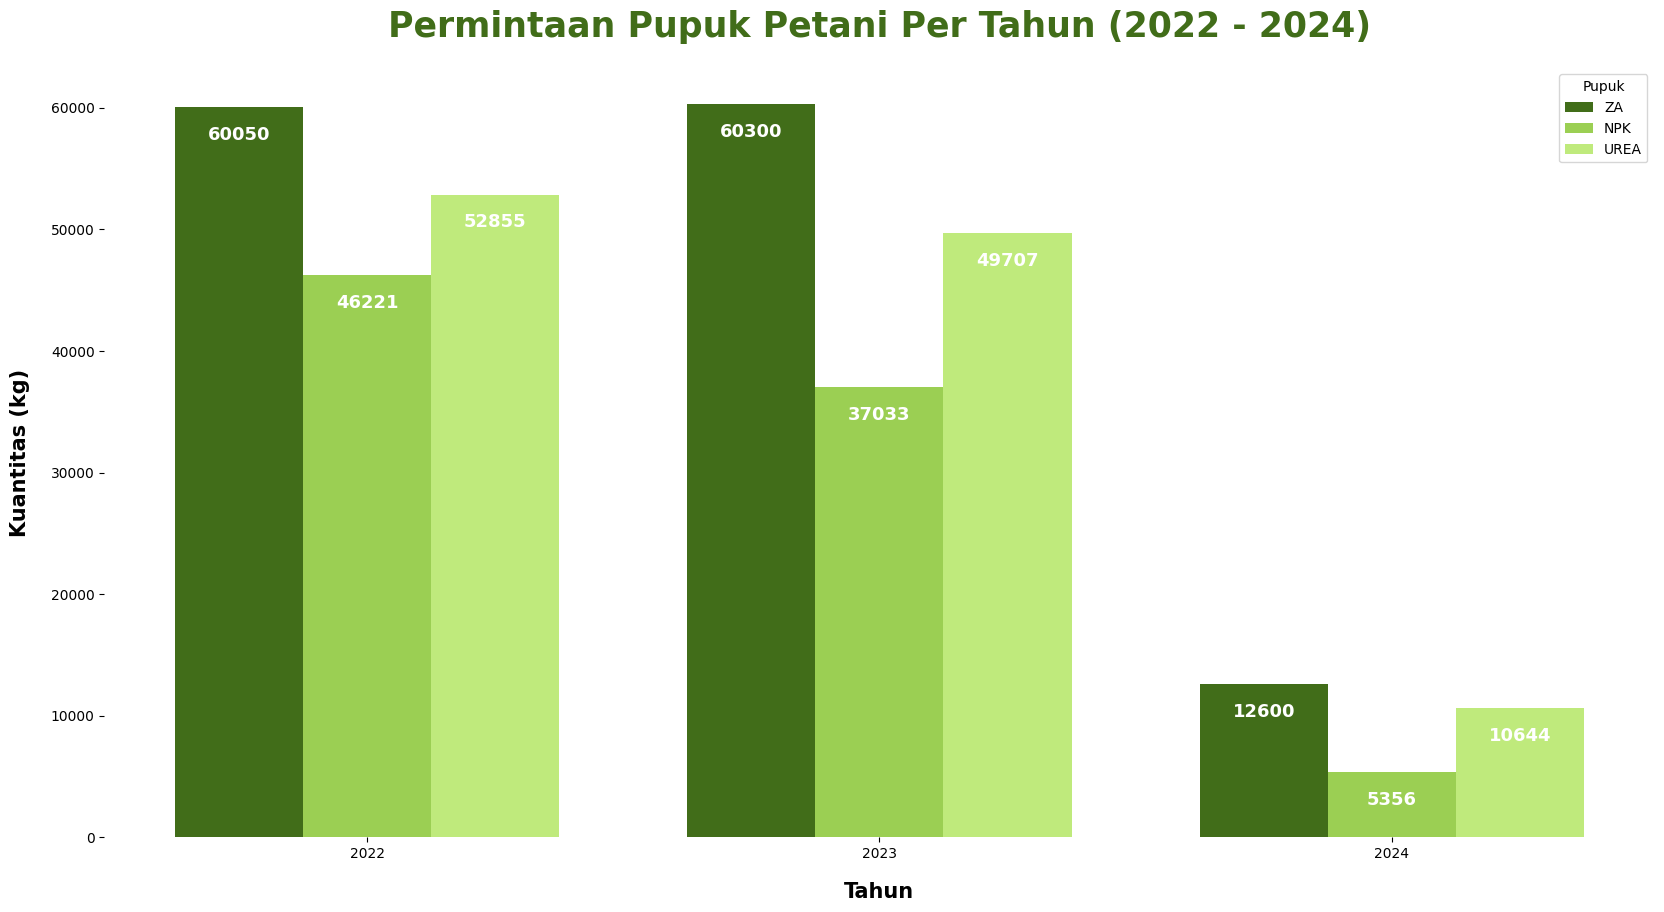

In [ ]:
# Mengelompokkan data berdasarkan tahun dan jenis pupuk
df_clean['Tahun'] = df_clean['Tanggal'].dt.year
df_grouped = df_clean.groupby('Tahun')[['UREA', 'NPK', 'ZA']].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

# Menentukan posisi bar
bar_width = 0.25
positions = df_grouped['Tahun'].astype(int)

# Plot ZA
plt.bar(positions - bar_width, df_grouped['ZA'], width=bar_width, color='#416D19', label='ZA')

# Plot NPK
plt.bar(positions, df_grouped['NPK'], width=bar_width, color='#9BCF53', label='NPK')

# Plot UREA
plt.bar(positions + bar_width, df_grouped['UREA'], width=bar_width, color='#BFEA7C', label='UREA')

# Menambahkan label pada masing-masing bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, yval - 3000, f'{yval:.0f}', ha='center', va='bottom', fontsize=13, fontweight='bold', color = 'white')


add_labels(plt.gca().patches)

# Modifying Title
title = 'Permintaan Pupuk Petani Per Tahun (2022 - 2024)'
plt.title(title,
          fontsize=25,
          loc='center',
          pad=22,
          color='#416D19',
          weight='bold')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Tahun', fontsize=15, fontweight='bold', labelpad=15)
plt.ylabel('Kuantitas (kg)', fontsize=15, fontweight='bold', labelpad=15)

# Mengatur tick label pada sumbu x
plt.xticks(positions, positions)

# Menambahkan legenda
plt.legend(title='Pupuk')

plt.grid(False)
for ax in plt.gcf().axes:
    # Mengubah warna sumbu menjadi 'none' untuk menghapusnya
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.set_xlabel('Tahun', fontsize=15, fontweight='bold', labelpad=15)
    ax.set_ylabel('Kuantitas (kg)', fontsize=15, fontweight='bold', labelpad=15)

# Menampilkan plot
plt.show()


In [ ]:
# Menghitung jumlah total permintaan pupuk ZA
total_ZA = df_grouped['ZA'].sum()
total_ZA

132950

# Fix Modeling

In [ ]:
df_train = train.copy()

## Analisis ADF & Pvalue

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df_train.ZA.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.681912
p-value: 0.000091


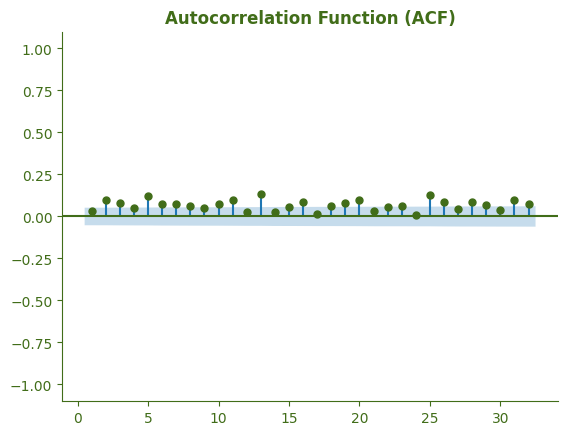

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Fungsi untuk menyesuaikan plot
def customize_plot(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#416D19')
    ax.spines['bottom'].set_color('#416D19')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='#416D19')
    ax.tick_params(axis='y', colors='#416D19')
    ax.grid(False)
    ax.set_ylim(-1.1, 1.1)  # Set the y-axis limits to ensure it covers more than 1
    for line in ax.get_lines():
        line.set_color('#416D19')
    for text in ax.texts:
        text.set_color('#416D19')
    for patch in ax.patches:
        patch.set_edgecolor('#416D19')
        patch.set_facecolor('#416D19')

# Plot ACF
fig, ax = plt.subplots()
plot_acf(df_train['ZA'], lags=32, ax=ax, zero=False)
customize_plot(ax)
plt.title('Autocorrelation Function (ACF)', color='#416D19', fontweight = 'bold')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf
from collections import defaultdict

# Hitung ACF
acf_result = acf(train['ZA'], nlags= 32)
acf_result = acf_result[1:]

# Simpan hasil dalam DataFrame
result_table = pd.DataFrame({'ACF': acf_result})

# Tampilkan tabel
result_table


,ACF
0,0.032325
1,0.096194
2,0.080180
3,0.050116
4,0.121410
5,0.073384
6,0.077240
7,0.062830
8,0.049123
9,0.074053


In [ ]:
result_table = result_table.sort_values(by='ACF', ascending=False)
result_table.head()


,ACF
12,0.132987
24,0.127472
4,0.121410
19,0.099766
10,0.098080


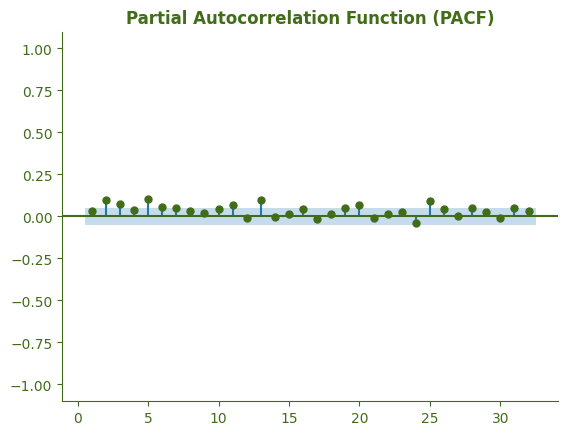

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Fungsi untuk menyesuaikan plot
def customize_plot(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#416D19')
    ax.spines['bottom'].set_color('#416D19')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x', colors='#416D19')
    ax.tick_params(axis='y', colors='#416D19')
    ax.grid(False)
    ax.set_ylim(-1.1, 1.1)  # Set the y-axis limits to ensure it covers more than 1
    for line in ax.get_lines():
        line.set_color('#416D19')
    for text in ax.texts:
        text.set_color('#416D19')
    for patch in ax.patches:
        patch.set_edgecolor('#416D19')
        patch.set_facecolor('#416D19')

# Plot PACF
fig, ax = plt.subplots()
plot_pacf(train['ZA'], lags=32, ax=ax, zero=False)
customize_plot(ax)
plt.title('Partial Autocorrelation Function (PACF)', color='#416D19', fontweight = 'bold')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import pacf
from collections import defaultdict

# Hitung PACF
pacf_result = pacf(train['ZA'], nlags=32)
pacf_result = pacf_result[1:]

# Simpan hasil dalam DataFrame
result_table = pd.DataFrame({'PACF': pacf_result})

# Tampilkan tabel
result_table


,PACF
0,0.032348
1,0.095385
2,0.075210
3,0.037668
4,0.107122
5,0.057266
6,0.051227
7,0.034436
8,0.021498
9,0.042583


In [ ]:
# Tampilkan tabel
result_table = result_table.sort_values(by='PACF', ascending=False)
result_table.head()


,PACF
4,0.107122
12,0.099935
1,0.095385
24,0.095181
2,0.075210


In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Warnings display
warnings.filterwarnings("ignore")

# Rentang nilai p, d, dan q yang ingin diuji (dihindari lag 4 yang sama dengan komponen musiman)
pr = [12, 24, 4, 19, 10]
dr = [0]
qr = [4, 12, 1, 24, 2]

# Inisialisasi list untuk menyimpan hasil
results = []

# Loop melalui kombinasi nilai p, d, dan q
for p in pr:
    for d in dr:
        for q in qr:
            order = (p, d, q)
            try:
                print(f"Processing ARIMA with order={order}")
                # Latih model ARIMA
                model = ARIMA(train['ZA'], order=order)
                fitted_model = model.fit()

                # Lakukan prediksi dengan model yang dilatih
                forecast = fitted_model.forecast(steps=len(test['ZA']))

                # Hitung RMSE
                rmse = sqrt(mean_squared_error(test['ZA'], forecast))

                # Tambahkan hasil ke list
                results.append({'Order': order, 'RMSE': rmse, 'Status': 'Success'})
            except Exception as e:
                print(f"Failed for ARIMA with order={order}: {e}")
                results.append({'Order': order, 'RMSE': None, 'Status': f'Failed: {e}'})
                continue

# Buat DataFrame dari hasil
results_df = pd.DataFrame(results)

# Tampilkan hasil
results_df


Processing ARIMA with order=(12, 0, 4)
Processing ARIMA with order=(12, 0, 12)
Processing ARIMA with order=(12, 0, 1)
Processing ARIMA with order=(12, 0, 24)
Processing ARIMA with order=(12, 0, 2)
Processing ARIMA with order=(24, 0, 4)
Processing ARIMA with order=(24, 0, 12)
Processing ARIMA with order=(24, 0, 1)
Processing ARIMA with order=(24, 0, 24)
Processing ARIMA with order=(24, 0, 2)
Processing ARIMA with order=(4, 0, 4)
Processing ARIMA with order=(4, 0, 12)
Processing ARIMA with order=(4, 0, 1)
Processing ARIMA with order=(4, 0, 24)
Processing ARIMA with order=(4, 0, 2)
Processing ARIMA with order=(19, 0, 4)
Processing ARIMA with order=(19, 0, 12)
Processing ARIMA with order=(19, 0, 1)
Processing ARIMA with order=(19, 0, 24)
Processing ARIMA with order=(19, 0, 2)
Processing ARIMA with order=(10, 0, 4)
Processing ARIMA with order=(10, 0, 12)
Processing ARIMA with order=(10, 0, 1)
Processing ARIMA with order=(10, 0, 24)
Processing ARIMA with order=(10, 0, 2)


,Order,RMSE,Status
0,"(12, 0, 4)",0.844415,Success
1,"(12, 0, 12)",0.844501,Success
2,"(12, 0, 1)",0.908074,Success
3,"(12, 0, 24)",0.890551,Success
4,"(12, 0, 2)",0.863776,Success
5,"(24, 0, 4)",0.844749,Success
6,"(24, 0, 12)",0.856809,Success
7,"(24, 0, 1)",0.904754,Success
8,"(24, 0, 24)",0.869801,Success
9,"(24, 0, 2)",0.906446,Success


In [ ]:
ordered = results_df.sort_values(by='RMSE', ascending = True)
ordered

,Order,RMSE,Status
20,"(10, 0, 4)",0.823334,Success
21,"(10, 0, 12)",0.840440,Success
0,"(12, 0, 4)",0.844415,Success
1,"(12, 0, 12)",0.844501,Success
5,"(24, 0, 4)",0.844749,Success
23,"(10, 0, 24)",0.849902,Success
13,"(4, 0, 24)",0.851669,Success
6,"(24, 0, 12)",0.856809,Success
15,"(19, 0, 4)",0.859949,Success
12,"(4, 0, 1)",0.861519,Success


In [ ]:
 # Menampilkan Best Model
best_fit = ordered.iloc[0]
print("Best Fit:")
print(best_fit)


Best Fit:
Order     (10, 0, 4)
RMSE        0.823334
Status       Success
Name: 20, dtype: object


In [ ]:
model = ARIMA(train['ZA'], order = (10, 0, 4))
model_fit = model.fit()

summary = model_fit.summary()
print(summary)

                               SARIMAX Results                                
Dep. Variable:                     ZA   No. Observations:                 1403
Model:                ARIMA(10, 0, 4)   Log Likelihood               -1966.027
Date:                Wed, 31 Jul 2024   AIC                           3964.055
Time:                        04:49:01   BIC                           4047.997
Sample:                             0   HQIC                          3995.431
                               - 1403                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0386      0.591     -0.065      0.948      -1.198       1.121
ar.L1         -0.7293      0.659     -1.107      0.268      -2.021       0.562
ar.L2          0.0666      0.062      1.081      0.2

## Fix

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Ambil parameter dari model terbaik
best_order = (10, 0, 4)

# Latih ulang model SARIMA dengan parameter terbaik dan seluruh data
best_model = ARIMA(df_std['ZA'], order=best_order)
best_fitted_model = best_model.fit()

# Menerapkan prediksi ke data baru menggunakan model terbaik
predicted_values = best_fitted_model.forecast(steps=len(df_std))

# Membuat DataFrame dari new_data dan hasil prediksi
df_results = pd.DataFrame({'Tanggal': df_std['Tanggal'],
                           'ZA': np.round(scaler.inverse_transform(df_std[['ZA']]).flatten()),
                           'Hasil_Prediksi': np.round(scaler.inverse_transform(predicted_values.values.reshape(-1, 1)).flatten())})

# Menampilkan DataFrame hasil prediksi
df_results


,Tanggal,ZA,Hasil_Prediksi
0,2022-01-01,50.0,57.0
1,2022-01-04,50.0,53.0
2,2022-01-05,50.0,54.0
3,2022-01-06,50.0,53.0
4,2022-01-07,50.0,50.0
...,...,...,...
1601,2024-04-29,50.0,66.0
1602,2024-04-29,50.0,66.0
1603,2024-04-30,0.0,66.0
1604,2024-04-30,50.0,66.0


In [ ]:
copy = df_results.copy()

In [ ]:
grouped_test = copy.groupby('Tanggal').sum()
grouped_test

,ZA,Hasil_Prediksi
Tanggal,,
2022-01-01,250.0,118.0
2022-01-02,250.0,169.0
2022-01-04,250.0,168.0
2022-01-05,100.0,115.0
2022-01-06,100.0,114.0
...,...,...
2024-04-26,200.0,198.0
2024-04-27,450.0,528.0
2024-04-28,400.0,594.0


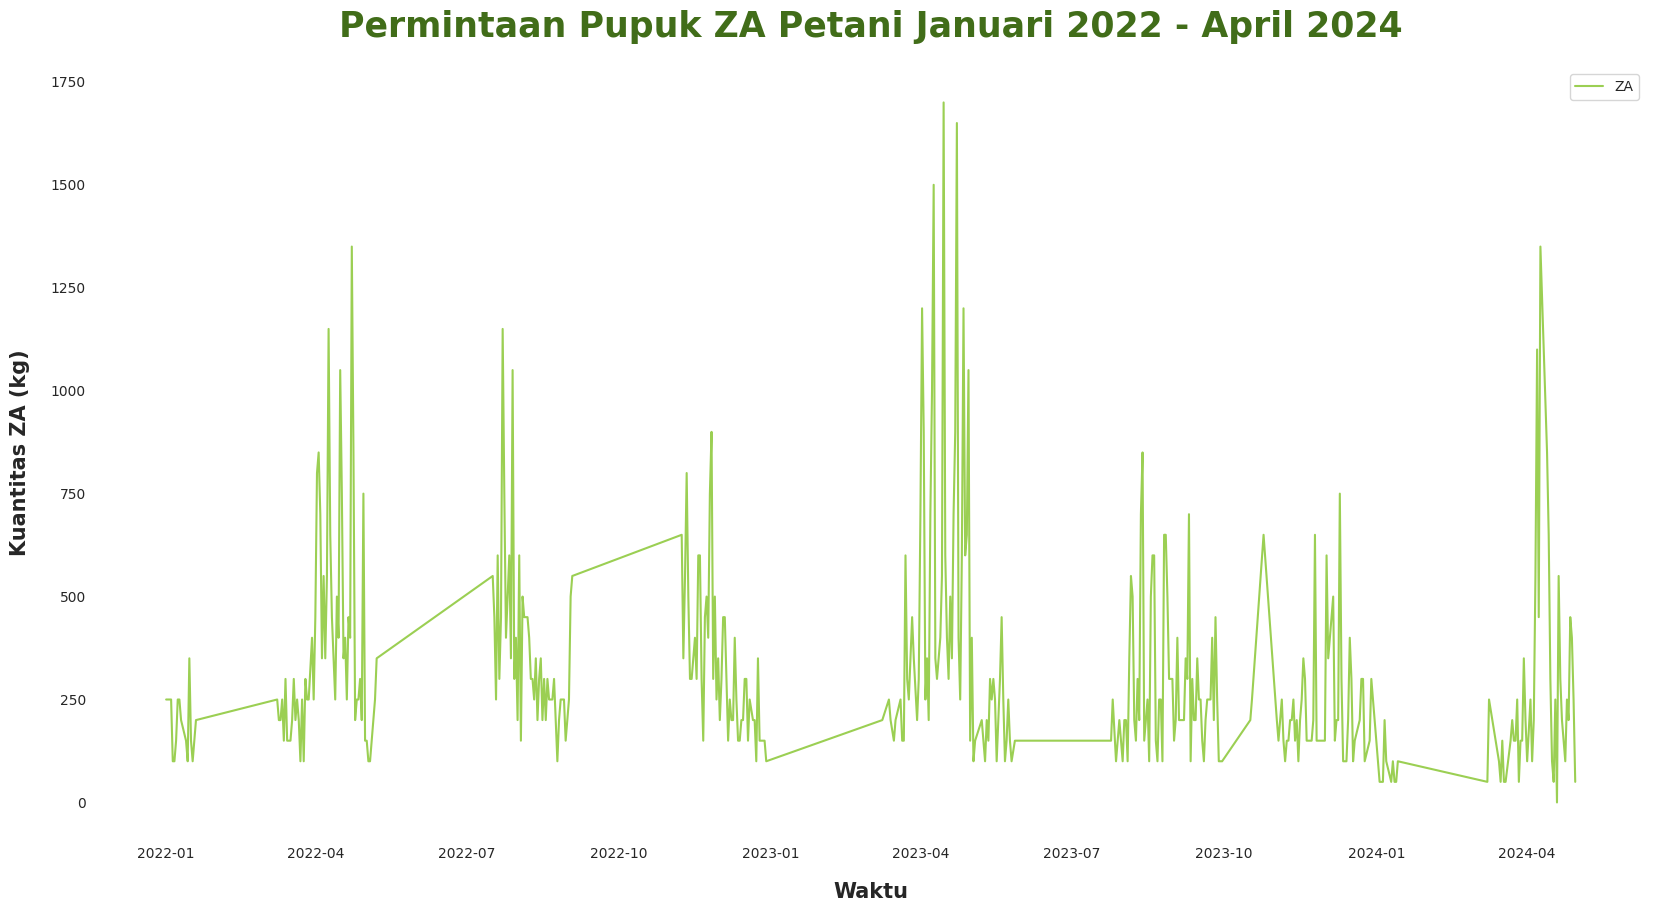

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')

# Plot data ZA_grouped
plt.plot(grouped_test.index, grouped_test['ZA'], label='ZA', color = '#9BCF53')

# Modifying Title
title = 'Permintaan Pupuk ZA Petani Januari 2022 - April 2024'
plt.title(title,
          fontsize = 25,
          loc = 'center',
          pad = 22,
          color = '#416D19',
          weight = 'bold')

# Menambahkan legenda
plt.legend()

plt.grid(False)
for ax in plt.gcf().axes:
    # Mengubah warna sumbu menjadi 'none' untuk menghapusnya
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.set_xlabel('Waktu', fontsize = 15, fontweight='bold', labelpad=15)
    ax.set_ylabel('Kuantitas ZA (kg)', fontsize = 15, fontweight='bold', labelpad=15)

# Menampilkan plot
plt.show()


In [ ]:
# Pastikan 'Tanggal' adalah datetime index
grouped_test.index = pd.to_datetime(grouped_test.index, format='%Y-%m')

# Filter data dari Januari hingga April 2024
grouped_test1 = grouped_test.loc['2024-01':'2024-04', ['Hasil_Prediksi']]

# Tampilkan hasil
grouped_test1


,Hasil_Prediksi
Tanggal,
2024-01-01,132.0
2024-01-03,66.0
2024-01-05,66.0
2024-01-06,132.0
2024-01-07,132.0
2024-01-10,66.0
2024-01-11,132.0
2024-01-12,66.0
2024-01-13,66.0


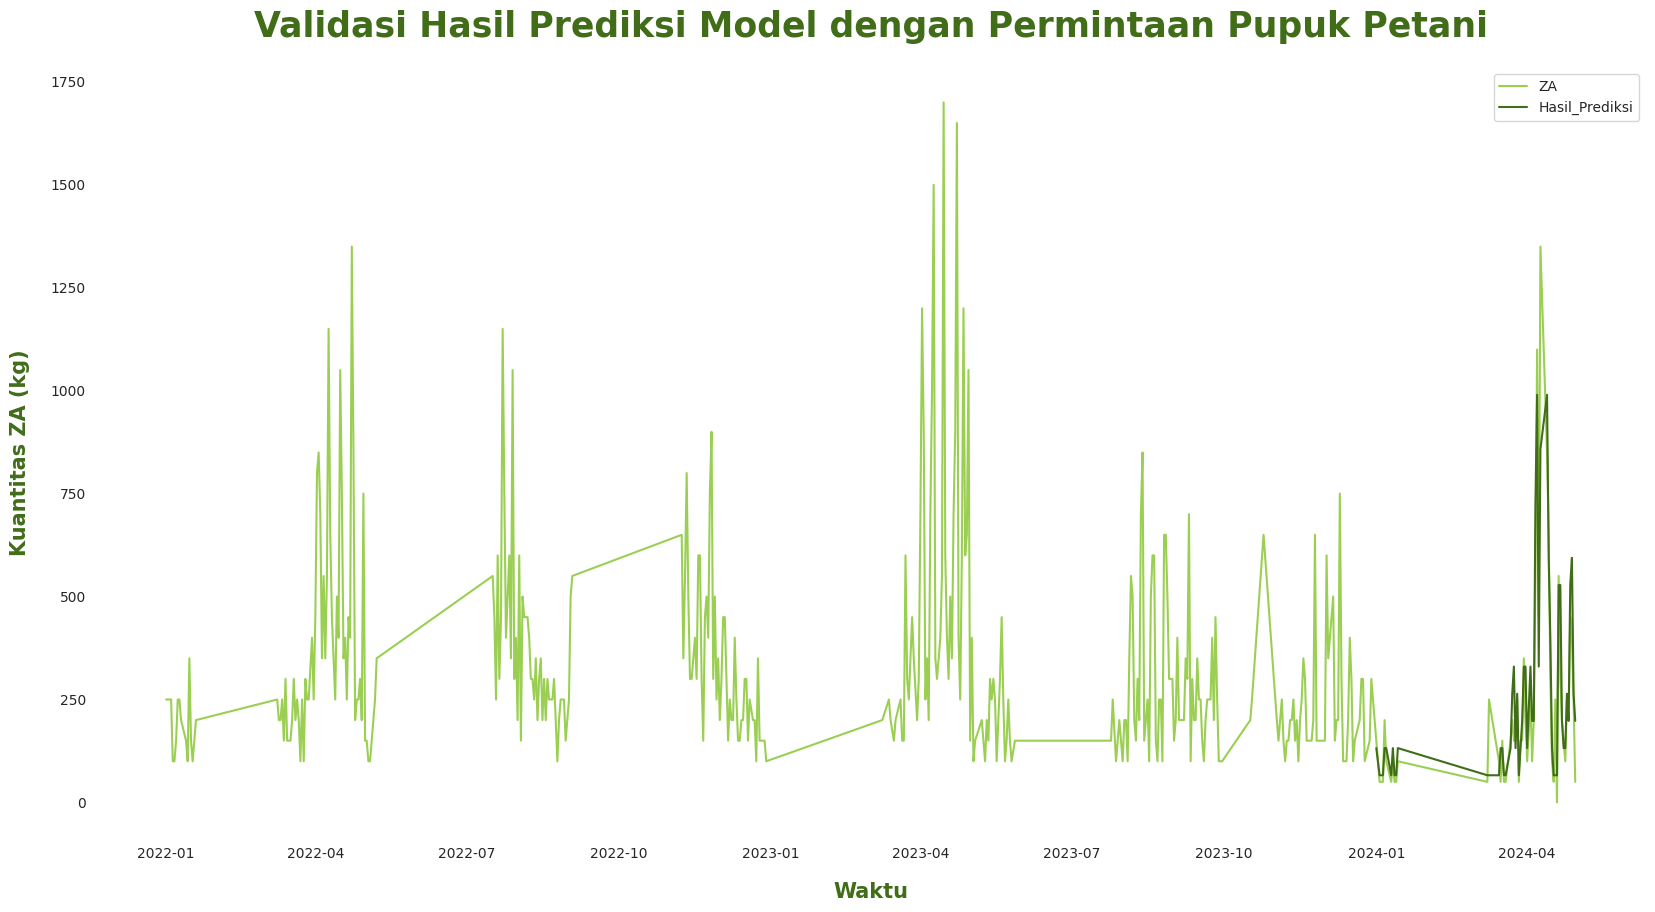

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')

# Plot data ZA_grouped
plt.plot(grouped_test.index, grouped_test['ZA'], label='ZA', color = '#9BCF53')

# Plot data Hasil Prediksi
plt.plot(grouped_test1.index, grouped_test1['Hasil_Prediksi'], label='Hasil_Prediksi', color = '#416D19')

# Modifying Title
title = 'Validasi Hasil Prediksi Model dengan Permintaan Pupuk Petani'
plt.title(title,
          fontsize = 25,
          loc = 'center',
          pad = 22,
          color = '#416D19',
          weight = 'bold')

# Menambahkan legenda
plt.legend()

plt.grid(False)
for ax in plt.gcf().axes:
    # Mengubah warna sumbu menjadi 'none' untuk menghapusnya
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.set_xlabel('Waktu', fontsize = 15, fontweight='bold', labelpad=15, color = '#416D19')
    ax.set_ylabel('Kuantitas ZA (kg)', fontsize = 15, fontweight='bold', labelpad=15, color = '#416D19')

# Menampilkan plot
plt.show()


# Implementation

## 2022

In [ ]:
grouped1 = grouped_test.copy()
grouped1

,ZA,Hasil_Prediksi
Tanggal,,
2022-01-01,250.0,118.0
2022-01-02,250.0,169.0
2022-01-04,250.0,168.0
2022-01-05,100.0,115.0
2022-01-06,100.0,114.0
...,...,...
2024-04-26,200.0,198.0
2024-04-27,450.0,528.0
2024-04-28,400.0,594.0


In [ ]:
# Tampilkan DataFrame hasil pengelompokkan
data_2022 = grouped1.loc['2022']

data_2022['Hari'] = data_2022.index.day
data_2022['Bulan'] = data_2022.index.month

# Buang kolom 'Hari' dan 'Bulan' yang tidak diperlukan lagi
data_2022.drop(['Hari'], axis=1, inplace=True)

data_2022

,ZA,Hasil_Prediksi,Bulan
Tanggal,,,
2022-01-01,250.0,118.0,1
2022-01-02,250.0,169.0,1
2022-01-04,250.0,168.0,1
2022-01-05,100.0,115.0,1
2022-01-06,100.0,114.0,1
...,...,...,...
2022-12-23,100.0,122.0,12
2022-12-24,350.0,122.0,12
2022-12-25,150.0,122.0,12


### Implemented

In [ ]:
data_2022.reset_index(inplace=True)

grouped = data_2022.drop(columns = 'Tanggal')
grouped

,ZA,Hasil_Prediksi,Bulan
0,250.0,118.0,1
1,250.0,169.0,1
2,250.0,168.0,1
3,100.0,115.0,1
4,100.0,114.0,1
...,...,...,...
167,100.0,122.0,12
168,350.0,122.0,12
169,150.0,122.0,12
170,150.0,122.0,12


In [ ]:
grouped2022 = grouped.groupby('Bulan').sum()
grouped2022

,ZA,Hasil_Prediksi
Bulan,,
1,3000.0,2294.0
3,4850.0,3457.0
4,16150.0,11139.0
5,1100.0,885.0
7,8100.0,4279.0
8,8900.0,5555.0
9,1300.0,599.0
11,10550.0,7415.0
12,6100.0,4275.0


## 2023

In [ ]:
grouped2 = grouped_test.copy()
grouped2

,ZA,Hasil_Prediksi
Tanggal,,
2022-01-01,250.0,118.0
2022-01-02,250.0,169.0
2022-01-04,250.0,168.0
2022-01-05,100.0,115.0
2022-01-06,100.0,114.0
...,...,...
2024-04-26,200.0,198.0
2024-04-27,450.0,528.0
2024-04-28,400.0,594.0


In [ ]:
# Tampilkan DataFrame hasil pengelompokkan
data_2023 = grouped2.loc['2023']

data_2023['Hari'] = data_2023.index.day
data_2023['Bulan'] = data_2023.index.month

# Buang kolom 'Hari' dan 'Bulan' yang tidak diperlukan lagi
data_2023.drop(['Hari'], axis=1, inplace=True)

data_2023

,ZA,Hasil_Prediksi,Bulan
Tanggal,,,
2023-03-09,200.0,128.0,3
2023-03-13,250.0,128.0,3
2023-03-14,200.0,191.0,3
2023-03-16,150.0,128.0,3
2023-03-17,200.0,128.0,3
...,...,...,...
2023-12-23,300.0,195.0,12
2023-12-24,300.0,260.0,12
2023-12-25,100.0,130.0,12


### Implemented

In [ ]:
data_2023.reset_index(inplace=True)

grouped = data_2023.drop(columns = 'Tanggal')
grouped

,ZA,Hasil_Prediksi,Bulan
0,200.0,128.0,3
1,250.0,128.0,3
2,200.0,191.0,3
3,150.0,128.0,3
4,200.0,128.0,3
...,...,...,...
180,300.0,195.0,12
181,300.0,260.0,12
182,100.0,130.0,12
183,150.0,130.0,12


In [ ]:
grouped2023 = grouped.groupby('Bulan').sum()
grouped2023

,ZA,Hasil_Prediksi
Bulan,,
3,4350.0,3074.0
4,20600.0,14477.0
5,4850.0,3934.0
7,1000.0,838.0
8,10350.0,7712.0
9,7000.0,6561.0
10,1100.0,1040.0
11,5150.0,4420.0
12,5900.0,5330.0


In [ ]:
# Tampilkan DataFrame hasil pengelompokkan
pred_2024 = grouped2023[grouped2023.index > 4]

pred_2024

,ZA,Hasil_Prediksi
Bulan,,
5,4850.0,3934.0
7,1000.0,838.0
8,10350.0,7712.0
9,7000.0,6561.0
10,1100.0,1040.0
11,5150.0,4420.0
12,5900.0,5330.0


In [ ]:
pred_2024 = pred_2024.filter(['Hasil_Prediksi'])
pred_2024

,Hasil_Prediksi
Bulan,
5,3934.0
7,838.0
8,7712.0
9,6561.0
10,1040.0
11,4420.0
12,5330.0


## 2024

In [ ]:
grouped3 = grouped_test.copy()
grouped3

,ZA,Hasil_Prediksi
Tanggal,,
2022-01-01,250.0,118.0
2022-01-02,250.0,169.0
2022-01-04,250.0,168.0
2022-01-05,100.0,115.0
2022-01-06,100.0,114.0
...,...,...
2024-04-26,200.0,198.0
2024-04-27,450.0,528.0
2024-04-28,400.0,594.0


In [ ]:
# Tampilkan DataFrame hasil pengelompokkan
data_2024 = grouped3.loc['2024']

data_2024['Hari'] = data_2024.index.day
data_2024['Bulan'] = data_2024.index.month
data_2024 = data_2024[data_2024['Bulan'] <= 4]

# Buang kolom 'Hari' dan 'Bulan' yang tidak diperlukan lagi
data_2024.drop(['Hari'], axis=1, inplace=True)

data_2024

,ZA,Hasil_Prediksi,Bulan
Tanggal,,,
2024-01-01,150.0,132.0,1
2024-01-03,50.0,66.0,1
2024-01-05,50.0,66.0,1
2024-01-06,200.0,132.0,1
2024-01-07,100.0,132.0,1
2024-01-10,50.0,66.0,1
2024-01-11,100.0,132.0,1
2024-01-12,50.0,66.0,1
2024-01-13,50.0,66.0,1


### Implemented

In [ ]:
data_2024.reset_index(inplace=True)

grouped = data_2024.drop(columns = 'Tanggal')
grouped

,ZA,Hasil_Prediksi,Bulan
0,150.0,132.0,1
1,50.0,66.0,1
2,50.0,66.0,1
3,200.0,132.0,1
4,100.0,132.0,1
5,50.0,66.0,1
6,100.0,132.0,1
7,50.0,66.0,1
8,50.0,66.0,1
9,100.0,132.0,1


In [ ]:
grouped2024 = grouped.groupby('Bulan').sum()
grouped2024

,ZA,Hasil_Prediksi
Bulan,,
1,900.0,990.0
3,2500.0,2772.0
4,9200.0,9636.0


In [ ]:
act2024 = grouped2024.filter(['ZA'])
act2024

,ZA
Bulan,
1,900.0
3,2500.0
4,9200.0


In [ ]:
pred_2025 = grouped2024.filter(['Hasil_Prediksi'])
pred_2025

,Hasil_Prediksi
Bulan,
1,990.0
3,2772.0
4,9636.0


In [ ]:
grouped2024 = pd.concat([act2024, pred_2024], axis=1)

grouped2024['ZA'] = grouped2024['ZA'].fillna(grouped2024['Hasil_Prediksi'])
grouped2024 = grouped2024.drop(columns=['Hasil_Prediksi'])
grouped2024

,ZA
Bulan,
1,900.0
3,2500.0
4,9200.0
5,3934.0
7,838.0
8,7712.0
9,6561.0
10,1040.0
11,4420.0


## Joined

In [ ]:
months = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
]

df = pd.DataFrame(months, columns=["Bulan"])
df

,Bulan
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
join = pd.merge(df, grouped2022, on = 'Bulan', how='left')
join = join.drop(columns=['Hasil_Prediksi'])
join

,Bulan,ZA
0,1,3000.0
1,2,NaN
2,3,4850.0
3,4,16150.0
4,5,1100.0
5,6,NaN
6,7,8100.0
7,8,8900.0
8,9,1300.0
9,10,NaN


In [ ]:
join1 = pd.merge(join, grouped2023, on = 'Bulan', how='left')
join1 = join1.drop(columns=['Hasil_Prediksi'])
join1

,Bulan,ZA_x,ZA_y
0,1,3000.0,NaN
1,2,NaN,NaN
2,3,4850.0,4350.0
3,4,16150.0,20600.0
4,5,1100.0,4850.0
5,6,NaN,NaN
6,7,8100.0,1000.0
7,8,8900.0,10350.0
8,9,1300.0,7000.0
9,10,NaN,1100.0


In [ ]:
join2 = pd.merge(join1, grouped2024, on = 'Bulan', how='left')
join2

,Bulan,ZA_x,ZA_y,ZA
0,1,3000.0,NaN,900.0
1,2,NaN,NaN,NaN
2,3,4850.0,4350.0,2500.0
3,4,16150.0,20600.0,9200.0
4,5,1100.0,4850.0,3934.0
5,6,NaN,NaN,NaN
6,7,8100.0,1000.0,838.0
7,8,8900.0,10350.0,7712.0
8,9,1300.0,7000.0,6561.0
9,10,NaN,1100.0,1040.0


In [ ]:
join3 = pd.merge(join2, pred_2025, on = 'Bulan', how='left')
join3


,Bulan,ZA_x,ZA_y,ZA,Hasil_Prediksi
0,1,3000.0,NaN,900.0,990.0
1,2,NaN,NaN,NaN,NaN
2,3,4850.0,4350.0,2500.0,2772.0
3,4,16150.0,20600.0,9200.0,9636.0
4,5,1100.0,4850.0,3934.0,NaN
5,6,NaN,NaN,NaN,NaN
6,7,8100.0,1000.0,838.0,NaN
7,8,8900.0,10350.0,7712.0,NaN
8,9,1300.0,7000.0,6561.0,NaN
9,10,NaN,1100.0,1040.0,NaN


In [ ]:
join3 = pd.merge(join2, pred_2025, on = 'Bulan', how='left')

join3 = join3.rename(columns={
    'ZA_x': 'ZA_2022',
    'ZA_y': 'ZA_2023',
    'ZA': 'ZA_2024',
    'Hasil_Prediksi': 'ZA_2025'
})

# Mengganti nilai NaN dengan 0 dalam DataFrame
join3 = join3.fillna(0)

# Menghapus ".0" dari nilai-nilai di kolom yang sesuai, jika kolom berisi float
join3['ZA_2022'] = join3['ZA_2022'].astype(int)
join3['ZA_2023'] = join3['ZA_2023'].astype(int)
join3['ZA_2024'] = join3['ZA_2024'].astype(int)
join3['ZA_2025'] = join3['ZA_2025'].astype(int)

join3.set_index("Bulan", inplace=True)
join3

,ZA_2022,ZA_2023,ZA_2024,ZA_2025
Bulan,,,,
1,3000,0,900,990
2,0,0,0,0
3,4850,4350,2500,2772
4,16150,20600,9200,9636
5,1100,4850,3934,0
6,0,0,0,0
7,8100,1000,838,0
8,8900,10350,7712,0
9,1300,7000,6561,0


# More

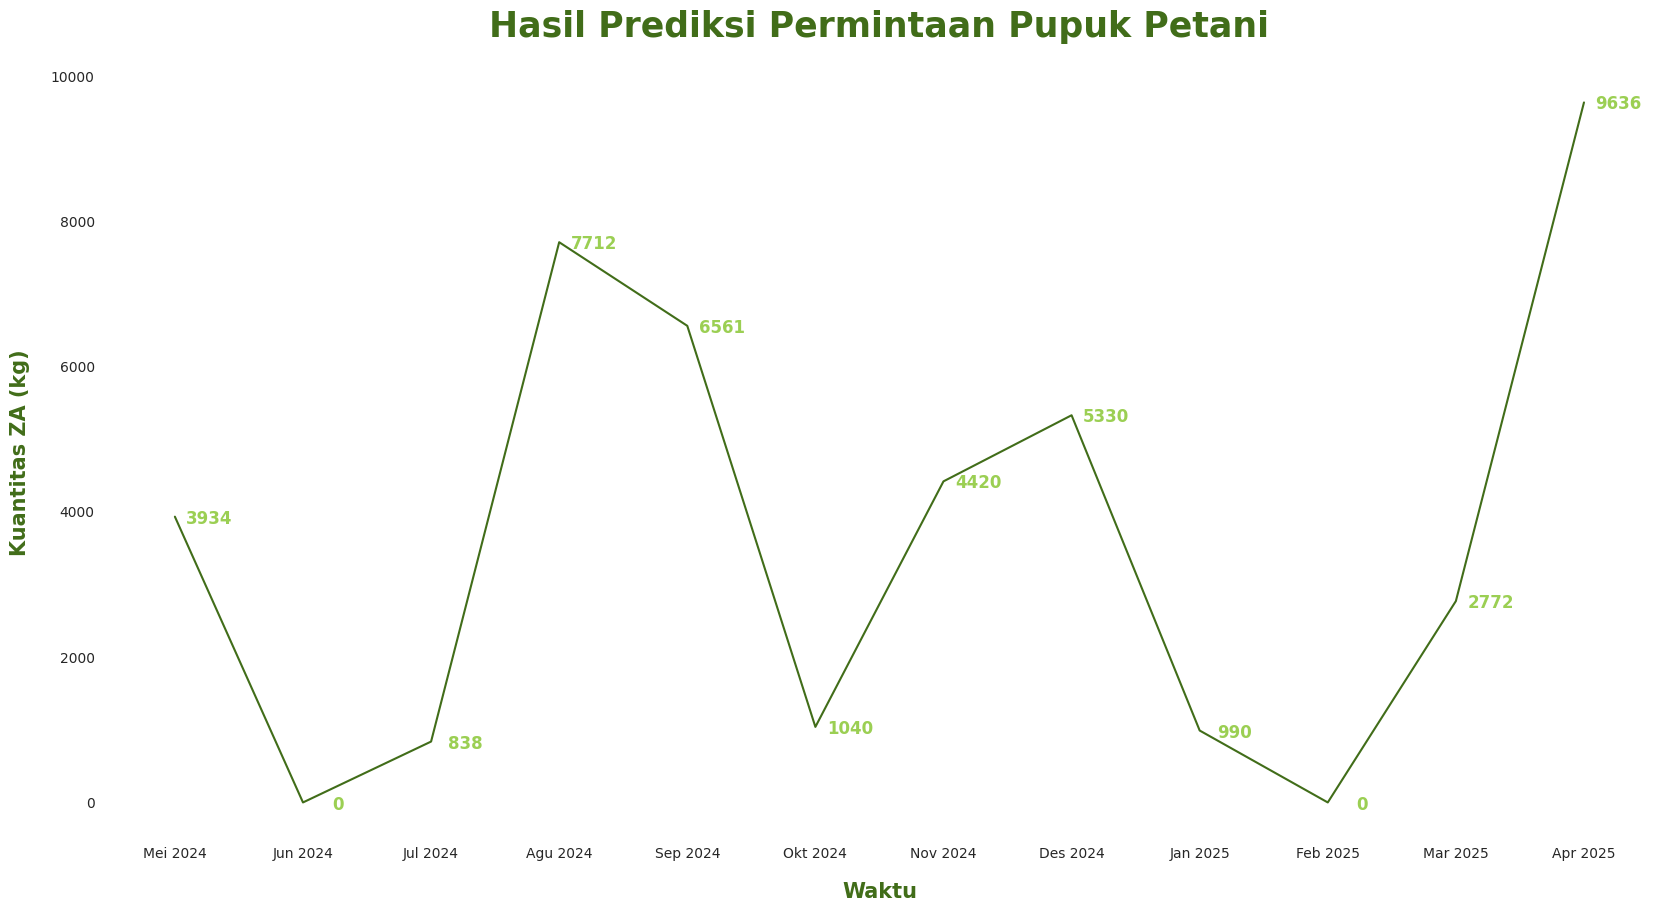

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data untuk Mei 2024 - April 2025
data = {
    'Bulan': ['Mei 2024', 'Jun 2024', 'Jul 2024', 'Agu 2024', 'Sep 2024', 'Okt 2024', 'Nov 2024', 'Des 2024', 'Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025'],
    'Data': [3934, 0, 838, 7712, 6561, 1040, 4420, 5330, 990, 0, 2772, 9636]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat plot
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')

# Plot data
plt.plot(df['Bulan'], df['Data'], label='Hasil Prediksi', color='#416D19')

# Menambahkan label nilai pada plot
for i, txt in enumerate(df['Data']):
    plt.annotate(txt, (df['Bulan'][i], df['Data'][i]), textcoords="offset points", xytext=(25,-5), ha='center', fontsize=12, color='#9BCF53',  weight='bold' )

# Modifying Title
title = 'Hasil Prediksi Permintaan Pupuk Petani'
plt.title(title, fontsize=25, loc='center', pad=22, color='#416D19', weight='bold')


plt.grid(False)
for ax in plt.gcf().axes:
    # Mengubah warna sumbu menjadi 'none' untuk menghapusnya
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')

    ax.set_xlabel('Waktu', fontsize=15, fontweight='bold', labelpad=15, color='#416D19')
    ax.set_ylabel('Kuantitas ZA (kg)', fontsize=15, fontweight='bold', labelpad=15, color='#416D19')

# Menampilkan plot
plt.show()
